In [1]:
import urllib.request
import json
import os
from bs4 import BeautifulSoup
from jsonmerge import merge
import re


In [137]:
# CREATE SOUP
def soupify(url):

    # Open the request and create the soup
    response = urllib.request.urlopen(url)
    soup = BeautifulSoup(response.read(), "lxml")
    return soup


In [187]:
def get_speech_urls(url):
    # Get the urls and add the base URL to each in the list
    soup=soupify(url)
    try:
        urls = soup.findAll('a',href=re.compile('(documents)'))[3:]
        baseurl = 'https://www.presidency.ucsb.edu'
        urls = map(lambda x: baseurl + x['href'], list(urls))
        
        url_list=[]
        for url in urls:
            url_list.append(url)
        return url_list
    except:
        print("Failed trying again")
        return get_speech_urls(url)

In [38]:
candidate=soup.findAll('h3')[0].text
candidate

'John McCain'

In [40]:
speech=soup.findAll('h1')[0].text
speech

'Speech to GOPAC'

In [59]:
date=soup.find(property="dc:date").string
date

'November 16, 2006'

In [117]:
text=soup.find('div', attrs={'class': "field-docs-content"}).text.replace('\n','')
text

'Thank you for this opportunity to talk about the future of our Party and our country.The voters obviously wanted to get our attention last week. While I would have preferred a gentler reproach than the one they delivered, I\'m not discouraged nor should any of us be. Democrats had a good election night. We did not. But no defeat is permanent. And parties, just like individuals, show their character in adversity. Now, is the occasion to show ours.The election was not an affirmation of the other party\'s program. Try as hard as I could, I couldn\'t find much evidence that my Democratic friends were offering anything that resembled a coherent platform or principled leadership on the critical issues that confront us today.Nor do I believe Americans rejected our values and governing philosophy. On the contrary, I think they rejected us because they felt we had come to value our incumbency over our principles, and partisanship, from both parties, was no longer a contest of ideas, but an eve

In [195]:
def get_script(url):
    soup = soupify(url)
    candidate=soup.findAll('h3')[0].text
    speech=soup.findAll('h1')[0].text
    date=soup.find(property="dc:date").string
    text=soup.find('div', attrs={'class': "field-docs-content"}).text.replace('\n',' ').strip()
    
    return {"candidate": candidate, "speech title": speech, 'date':date, 'text':text}

In [194]:
get_script('https://www.presidency.ucsb.edu/documents/speech-gopac')

{'candidate': 'John McCain',
 'speech title': 'Speech to GOPAC',
 'date': 'November 16, 2006',
 'text': 'Thank you for this opportunity to talk about the future of our Party and our country. The voters obviously wanted to get our attention last week. While I would have preferred a gentler reproach than the one they delivered, I\'m not discouraged nor should any of us be. Democrats had a good election night. We did not. But no defeat is permanent. And parties, just like individuals, show their character in adversity. Now, is the occasion to show ours. The election was not an affirmation of the other party\'s program. Try as hard as I could, I couldn\'t find much evidence that my Democratic friends were offering anything that resembled a coherent platform or principled leadership on the critical issues that confront us today. Nor do I believe Americans rejected our values and governing philosophy. On the contrary, I think they rejected us because they felt we had come to value our incumb

In [197]:
def do_scrape(max_page_count):

    # Scrape the script from each URL and add to a list
    speeches = []
    
    # Stores number of pages scraped
    page_count = 0

    while page_count < max_page_count:

        print("\n \n ---------------PAGE COUNT: ", page_count)
        # Url of search page
        base_url1 = 'https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=01-01-2005&to%5Bdate%5D=&person2=&category2%5B0%5D=&category2%5B1%5D=63&items_per_page=100'


        # Get the speeches list from the main page
        urls=get_speech_urls(base_url1 + "&page=" + str(page_count))

        for url in urls:
            print(url)
            speeches.append(get_script(url))
            
        page_count+=1

    
    # Write the output to a file

    try:
        with open("Speeches.json", 'w') as json_file:
            json.dump(speeches, json_file, indent=4)
        return 'Speech document created.'
    except:
        return 'Could not create episode document.'

In [198]:
do_scrape(20)


 
 ---------------PAGE COUNT:  0
https://www.presidency.ucsb.edu/documents/speech-gopac
https://www.presidency.ucsb.edu/documents/speech-the-federalist-society
https://www.presidency.ucsb.edu/documents/iraq-speech-new-hampshire-democratic-state-party-state-central-committee
https://www.presidency.ucsb.edu/documents/video-transcript-presidential-exploratory-committee-announcement
https://www.presidency.ucsb.edu/documents/remarks-let-the-conversation-begin-webcast
https://www.presidency.ucsb.edu/documents/remarks-the-seventh-annual-herzliya-conference-herzliya-israel
https://www.presidency.ucsb.edu/documents/excerpts-from-governor-mitt-romneys-remarks-the-seventh-annual-herzliya-conference
https://www.presidency.ucsb.edu/documents/remarks-let-the-conversation-begin-webcast-0
https://www.presidency.ucsb.edu/documents/remarks-let-the-conversation-begin-webcast-1
https://www.presidency.ucsb.edu/documents/remarks-the-dedication-the-center-for-the-intrepid
https://www.presidency.ucsb.edu/doc

https://www.presidency.ucsb.edu/documents/excerpts-remarks-town-hall-meeting-new-castle-new-hampshire
https://www.presidency.ucsb.edu/documents/remarks-the-financial-timessais-forum-iraq-washington-dc
https://www.presidency.ucsb.edu/documents/excerpts-remarks-the-us-airport-and-seaport-association-washington-dc
https://www.presidency.ucsb.edu/documents/excerpts-remarks-bedford-new-hampshire
https://www.presidency.ucsb.edu/documents/excerpts-interview-with-peter-cook-bloomberg
https://www.presidency.ucsb.edu/documents/remarks-spartanburg-south-carolina-0
https://www.presidency.ucsb.edu/documents/remarks-the-national-right-life-convention-forum
https://www.presidency.ucsb.edu/documents/commencement-address-the-us-merchant-marine-academy
https://www.presidency.ucsb.edu/documents/remarks-washington-dc-take-back-america-2007
https://www.presidency.ucsb.edu/documents/speech-take-back-america-2007
https://www.presidency.ucsb.edu/documents/address-the-policy-exchange-london
https://www.preside

https://www.presidency.ucsb.edu/documents/remarks-health-care-des-moines-iowa
https://www.presidency.ucsb.edu/documents/speech-making-americas-schools-work
https://www.presidency.ucsb.edu/documents/remarks-the-nato-supreme-allied-command-transformation-seminar-norfolk-virginia
https://www.presidency.ucsb.edu/documents/remarks-des-moines-iowa-lessons-from-iraq
https://www.presidency.ucsb.edu/documents/remarks-keene-new-hampshire-0
https://www.presidency.ucsb.edu/documents/excerpts-remarks-the-conservative-party-new-york-state-reception
https://www.presidency.ucsb.edu/documents/remarks-manchester-new-hampshire-helping-parents-balance-work-family
https://www.presidency.ucsb.edu/documents/excerpts-remarks-the-republican-jewish-coalition-washington-dc
https://www.presidency.ucsb.edu/documents/excerpts-remarks-the-republican-jewish-coalition-2008-presidential-candidates-forum
https://www.presidency.ucsb.edu/documents/excerpts-remarks-the-club-for-growth
https://www.presidency.ucsb.edu/docume

https://www.presidency.ucsb.edu/documents/remarks-following-the-iowa-caucuses-3
https://www.presidency.ucsb.edu/documents/remarks-following-the-iowa-caucuses-4
https://www.presidency.ucsb.edu/documents/remarks-following-the-iowa-caucuses-5
https://www.presidency.ucsb.edu/documents/remarks-following-the-iowa-caucuses-6
https://www.presidency.ucsb.edu/documents/remarks-the-new-hampshire-democratic-party-100-club-dinner-milford
https://www.presidency.ucsb.edu/documents/interview-with-bob-schieffer-cbs-news-face-the-nation-5
https://www.presidency.ucsb.edu/documents/remarks-following-the-new-hampshire-primary-0
https://www.presidency.ucsb.edu/documents/remarks-following-the-new-hampshire-primary-2
https://www.presidency.ucsb.edu/documents/remarks-following-the-new-hampshire-primary
https://www.presidency.ucsb.edu/documents/remarks-following-the-new-hampshire-primary-1
https://www.presidency.ucsb.edu/documents/remarks-following-the-new-hampshire-primary-3
https://www.presidency.ucsb.edu/doc

https://www.presidency.ucsb.edu/documents/remarks-following-the-ohio-rhode-island-texas-and-vermont-primaries
https://www.presidency.ucsb.edu/documents/remarks-following-the-ohio-rhode-island-texas-and-vermont-primaries-0
https://www.presidency.ucsb.edu/documents/excerpts-remarks-harrisburg-pennsylvania
https://www.presidency.ucsb.edu/documents/remarks-chicago-accepting-the-endorsement-us-admirals-and-generals
https://www.presidency.ucsb.edu/documents/interview-with-keith-olbermann-msnbcs-countdown
https://www.presidency.ucsb.edu/documents/remarks-the-george-washingon-university-washington-dc
https://www.presidency.ucsb.edu/documents/address-the-national-constitution-center-philadelphia-more-perfect-union
https://www.presidency.ucsb.edu/documents/remarks-fayetteville-north-carolina-the-world-beyond-iraq
https://www.presidency.ucsb.edu/documents/remarks-the-solutions-for-america-event-detroit-michigan
https://www.presidency.ucsb.edu/documents/interview-with-terry-moran-abc-news
https://

https://www.presidency.ucsb.edu/documents/remarks-the-national-rifle-association-annual-meeting-louisville-kentucky
https://www.presidency.ucsb.edu/documents/remarks-gresham-oregon
https://www.presidency.ucsb.edu/documents/interview-with-wolf-blitzer-cnns-late-edition-0
https://www.presidency.ucsb.edu/documents/remarks-the-national-restaurant-association-chicago-illinois
https://www.presidency.ucsb.edu/documents/remarks-following-the-kentucky-and-oregon-primaries
https://www.presidency.ucsb.edu/documents/remarks-following-the-kentucky-and-oregon-primaries-0
https://www.presidency.ucsb.edu/documents/remarks-cuban-independence-day-miami-florida
https://www.presidency.ucsb.edu/documents/remarks-counting-every-vote-solutions-for-america-event-boca-raton-florida
https://www.presidency.ucsb.edu/documents/remarks-des-moines-iowa-4
https://www.presidency.ucsb.edu/documents/remarks-the-cuban-american-national-foundation-miami-florida
https://www.presidency.ucsb.edu/documents/commencement-addres

https://www.presidency.ucsb.edu/documents/remarks-the-2008-american-gi-forum-the-united-states-national-convention-denver-colorado
https://www.presidency.ucsb.edu/documents/remarks-the-americans-with-disabilities-conference
https://www.presidency.ucsb.edu/documents/senator-mccains-weekly-radio-address-6
https://www.presidency.ucsb.edu/documents/interview-with-tom-brokaw-nbc-news-meet-the-press-0
https://www.presidency.ucsb.edu/documents/interview-with-george-stephanopoulos-abc-news-this-week-0
https://www.presidency.ucsb.edu/documents/remarks-question-and-answer-session-with-minority-journalists-the-unity-08-convention
https://www.presidency.ucsb.edu/documents/interview-with-wolf-blitzer-cnns-late-edition
https://www.presidency.ucsb.edu/documents/interview-with-larry-king-cnn-2
https://www.presidency.ucsb.edu/documents/remarks-town-hall-springfield-missouri
https://www.presidency.ucsb.edu/documents/remarks-town-hall-cedar-rapids-iowa
https://www.presidency.ucsb.edu/documents/remarks-to

https://www.presidency.ucsb.edu/documents/remarks-green-bay-wisconsin
https://www.presidency.ucsb.edu/documents/remarks-the-irish-american-presidential-forum-scranton-pennsylvania
https://www.presidency.ucsb.edu/documents/remarks-tampa-florida-4
https://www.presidency.ucsb.edu/documents/remarks-dow-corning-freeland-michigan
https://www.presidency.ucsb.edu/documents/remarks-dunedin-florida
https://www.presidency.ucsb.edu/documents/remarks-the-economic-crisis-new-york-city
https://www.presidency.ucsb.edu/documents/informal-exchange-with-reporters-clearwater-florida
https://www.presidency.ucsb.edu/documents/interview-with-katie-couric-cbs-news-part-1-2
https://www.presidency.ucsb.edu/documents/interview-with-charlie-gibson-abc-news
https://www.presidency.ucsb.edu/documents/remarks-the-clinton-global-initiative-new-york-city
https://www.presidency.ucsb.edu/documents/remarks-the-clinton-global-initiative-new-york-city-0
https://www.presidency.ucsb.edu/documents/interview-with-brit-hume-fox-

https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-13
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-indianapolis-indiana
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-beverly-hills-california
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-12
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-chicago-illinois-1
https://www.presidency.ucsb.edu/documents/remarks-democratic-governors-association-fundraiser
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-new-york-city-10
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-11
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-atlanta
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee

https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-dallas-texas
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-dallas
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-st-louis-missouri
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-st-louis
https://www.presidency.ucsb.edu/documents/remarks-us-foreign-policy-the-citadel-charleston-south-carolina
https://www.presidency.ucsb.edu/documents/remarks-the-values-voter-summit-washington-dc-0
https://www.presidency.ucsb.edu/documents/remarks-the-values-voter-summit-washington-dc-2
https://www.presidency.ucsb.edu/documents/remarks-the-values-voter-summit-washington-dc-3
https://www.presidency.ucsb.edu/documents/remarks-the-values-voter-summit-washington-dc-4
https://www.presidency.ucsb.edu/documents/remarks-the-values-voter-summit-washington-dc-5
https://www.presidency.ucsb.edu/d

https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-san-francisco
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-medina-washington
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-bellevue-washington
https://www.presidency.ucsb.edu/documents/video-address-newt-gingrich-250-per-gallon-gasoline-energy-independence-and-jobs-0
https://www.presidency.ucsb.edu/documents/video-address-newt-gingrich-250-per-gallon-gasoline-energy-independence-and-jobs
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-coral-gables
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-pinecrest-florida
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-orlando-florida
https://www.presidency.ucsb.edu/documents/remarks-the-detroit-economic-club-detroit-michigan-0
https://www.presidency.ucsb.edu/documents/remark

https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-san-francisco-california-1
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-beverly-hills-california
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-beverly-hills
https://www.presidency.ucsb.edu/documents/remarks-st-louis-missouri-champion-for-free-enterprise
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-view-park-california
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-owings-mills-maryland
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-baltimore-maryland
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-philadelphia
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-philadelphia-0
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fun

https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-boulder-colorado-0
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-toledo-ohio
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-norfolk-virginia
https://www.presidency.ucsb.edu/documents/address-the-democratic-national-convention-charlotte-north-carolina
https://www.presidency.ucsb.edu/documents/remarks-concord-new-hampshire-0
https://www.presidency.ucsb.edu/documents/address-accepting-the-vice-presidential-nomination-the-democratic-national-convention-2
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-portsmouth-new-hampshire
https://www.presidency.ucsb.edu/documents/remarks-campaign-event-orange-city-iowa
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-iowa-city-iowa
https://www.presidency.ucsb.edu/documents/remarks-campaign-event-nashua-new-hampshire
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-seminole-florida
https://www.presidency.

https://www.presidency.ucsb.edu/documents/remarks-with-paul-ryan-campaign-event-morrison-colorado
https://www.presidency.ucsb.edu/documents/remarks-cleveland-state-university
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-davenport-iowa
https://www.presidency.ucsb.edu/documents/remarks-campaign-event-reno-nevada
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-denver-colorado
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-las-vegas-nevada
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-tampa-florida
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-richmond-virginia
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-cleveland-ohio
https://www.presidency.ucsb.edu/documents/remarks-the-economy-ames-iowa
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-nashua-new-hampshire
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-green-bay-wisconsin
https://www.presiden

https://www.presidency.ucsb.edu/documents/video-remarks-announcing-candidacy-for-president-1
https://www.presidency.ucsb.edu/documents/remarks-announcing-candidacy-for-president-miami-florida
https://www.presidency.ucsb.edu/documents/interview-with-jake-tapper-cnn-0
https://www.presidency.ucsb.edu/documents/remarks-question-and-answer-session-kirkwood-community-college-cedar-rapids-iowa
https://www.presidency.ucsb.edu/documents/remarks-the-first-the-nation-republican-leadership-summit-nashua-new-hampshire-1
https://www.presidency.ucsb.edu/documents/remarks-the-first-the-nation-republican-leadership-summit-nashua-new-hampshire
https://www.presidency.ucsb.edu/documents/remarks-the-first-the-nation-republican-leadership-summit-nashua-new-hampshire-0
https://www.presidency.ucsb.edu/documents/remarks-keene-new-hampshire-1
https://www.presidency.ucsb.edu/documents/address-the-david-n-dinkins-leadership-public-policy-forum-columbia-university-new-york
https://www.presidency.ucsb.edu/documents

https://www.presidency.ucsb.edu/documents/interview-with-john-dickerson-cbs-news-face-the-nation-2
https://www.presidency.ucsb.edu/documents/remarks-madison-wisconsin-announcing-the-end-presidential-campaign-activities
https://www.presidency.ucsb.edu/documents/remarks-rfd-tvs-rural-town-hall-west-des-moines-iowa
https://www.presidency.ucsb.edu/documents/interview-with-dana-bash-cnn
https://www.presidency.ucsb.edu/documents/remarks-the-values-voter-summit-washington-dc-6
https://www.presidency.ucsb.edu/documents/interview-with-chuck-todd-nbcs-meet-the-press
https://www.presidency.ucsb.edu/documents/interview-with-al-sharpton-msnbcs-politics-nation
https://www.presidency.ucsb.edu/documents/remarks-fundraiser-for-senator-patricia-l-murray-seattle-washington
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-san-francisco-california-1
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-los-angeles-california-1
h

https://www.presidency.ucsb.edu/documents/remarks-the-aipac-policy-conference-washington-dc-2
https://www.presidency.ucsb.edu/documents/remarks-policy-the-middle-east-salt-lake-city-utah
https://www.presidency.ucsb.edu/documents/interview-with-chris-hayes-msnbcs-all
https://www.presidency.ucsb.edu/documents/interview-with-erin-burnett-cnn
https://www.presidency.ucsb.edu/documents/interview-with-rachel-maddow-msnbc-madison-wisconsin
https://www.presidency.ucsb.edu/documents/interview-the-daily-news-editorial-board
https://www.presidency.ucsb.edu/documents/remarks-democratic-congressional-campaign-committee-dinner-los-angeles-california
https://www.presidency.ucsb.edu/documents/remarks-democratic-congressional-campaign-committee-dinner-san-francisco-california
https://www.presidency.ucsb.edu/documents/remarks-conference-hosted-the-pontifical-academy-social-sciences-vatican-city

 
 ---------------PAGE COUNT:  14
https://www.presidency.ucsb.edu/documents/interview-with-john-dickerson-cbs-

https://www.presidency.ucsb.edu/documents/remarks-the-remembrance-project-luncheon-the-omni-houston-hotel-westside-houston-texas
https://www.presidency.ucsb.edu/documents/remarks-the-congressional-black-caucus-washington-dc
https://www.presidency.ucsb.edu/documents/remarks-temple-university-philadelphia-pennsylvania
https://www.presidency.ucsb.edu/documents/remarks-high-point-university-high-point-north-carolina-0
https://www.presidency.ucsb.edu/documents/remarks-the-frontline-outreach-center-orlando-florida
https://www.presidency.ucsb.edu/documents/remarks-rally-sun-center-studios-chester-township-pennsylvania
https://www.presidency.ucsb.edu/documents/remarks-the-shale-insight-tm-conferencee-the-david-l-lawrence-convention-center-pittsburgh
https://www.presidency.ucsb.edu/documents/remarks-rally-berglund-center-roanoke-virginia
https://www.presidency.ucsb.edu/documents/remarks-wake-technical-community-college-raleigh-north-carolina
https://www.presidency.ucsb.edu/documents/remarks-the

https://www.presidency.ucsb.edu/documents/remarks-make-america-great-again-rally-billings-montana
https://www.presidency.ucsb.edu/documents/remarks-make-america-great-again-rally-wheeling-west-virginia
https://www.presidency.ucsb.edu/documents/remarks-make-america-great-again-rally-elko-nevada
https://www.presidency.ucsb.edu/documents/remarks-make-america-great-again-rally-tupelo-mississippi
https://www.presidency.ucsb.edu/documents/remarks-make-america-great-again-rally-biloxi-mississippi

 
 ---------------PAGE COUNT:  16

 
 ---------------PAGE COUNT:  17

 
 ---------------PAGE COUNT:  18

 
 ---------------PAGE COUNT:  19


'Speech document created.'

In [2]:
import pandas as pd
import numpy as np
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [3]:
# Load the JSON file into a data frame
df = pd.read_json("Speeches.json", orient='columns')

In [4]:
df

,candidate,date,speech title,text
0,John McCain,2006-11-16,Speech to GOPAC,Thank you for this opportunity to talk about t...
1,John McCain,2006-11-16,Speech to the Federalist Society,"Thank you, Ted, for that kind introduction. I ..."
2,Bill Richardson,2006-12-16,Iraq Speech to New Hampshire Democratic State ...,Thank you Kathy. You are a great State Chair. ...
3,Hillary Clinton,2007-01-20,Video Transcript: Presidential Exploratory Com...,HILLARY CLINTON: I announced today that I am f...
4,Hillary Clinton,2007-01-22,"Remarks in a ""Let the Conversation Begin Webcast""","SENATOR CLINTON: Hi, everyone, and welcome to ..."
5,Mitt Romney,2007-01-23,Remarks at the Seventh Annual Herzliya Confere...,"Thank you, Ron. It's an honor to be here today..."
6,Mitt Romney,2007-01-23,Excerpts From Governor Mitt Romney's Remarks a...,Governor Romney's Five Step Plan Of Action To ...
7,Hillary Clinton,2007-01-23,"Remarks in a ""Let the Conversation Begin Webcast""","SENATOR CLINTON: Hello, and welcome back, thos..."
8,Hillary Clinton,2007-01-24,"Remarks in a ""Let the Conversation Begin Webcast""",HILLARY CLINTON: Hello and welcome back. We ha...
9,John McCain,2007-01-29,Remarks at the Dedication of the Center for th...,Thank you. I am honored to participate in the ...


In [5]:
# create a political party column
df['party']=np.where((df.candidate=='Hillary Clinton')|(df.candidate=='Bill Richardson')|(df.candidate=='Barack Obama')|(df.candidate=='John Edwards')|(df.candidate=='Christopher Dodd')|(df.candidate=='Joe Biden')|(df.candidate=='Bernie Sanders')|(df.candidate=="Martin O'Malley")|(df.candidate=="Lincoln Chafee")|(df.candidate=="Jim Webb"),'Democrat','Republican')


In [6]:
df[(df.candidate=='Joe Biden')].head()

,candidate,date,speech title,text,party
17,Joe Biden,2007-02-05,Remarks on the Senate Floor on the Bipartisan ...,"Today, the Senate takes the first step in a bi...",Democrat
26,Joe Biden,2007-02-15,Remarks at the Brookings Institution on Iraq's...,This is a time of tremendous challenge for Ame...,Democrat
34,Joe Biden,2007-03-08,Opening Statement in the Senate Foreign Relati...,Success in Afghanistan is Still Possible if We...,Democrat
45,Joe Biden,2007-04-03,Remarks at the Drake University School of Law,"Since before our founding, the United States h...",Democrat
61,Joe Biden,2007-04-29,"Interview with Tim Russert on NBC News' ""Meet ...","RUSSERT: Welcome, Senator Biden, to our Meet t...",Democrat


In [7]:
df[(df.party=='Democrat')].candidate.unique()

array(['Bill Richardson', 'Hillary Clinton', 'John Edwards', 'Joe Biden',
       'Barack Obama', 'Christopher Dodd', 'Bernie Sanders',
       "Martin O'Malley", 'Lincoln Chafee', 'Jim Webb'], dtype=object)

In [8]:
df[(df['date'] > '2006-01-01') & (df['date'] < '2009-12-01')]

,candidate,date,speech title,text,party
0,John McCain,2006-11-16,Speech to GOPAC,Thank you for this opportunity to talk about t...,Republican
1,John McCain,2006-11-16,Speech to the Federalist Society,"Thank you, Ted, for that kind introduction. I ...",Republican
2,Bill Richardson,2006-12-16,Iraq Speech to New Hampshire Democratic State ...,Thank you Kathy. You are a great State Chair. ...,Democrat
3,Hillary Clinton,2007-01-20,Video Transcript: Presidential Exploratory Com...,HILLARY CLINTON: I announced today that I am f...,Democrat
4,Hillary Clinton,2007-01-22,"Remarks in a ""Let the Conversation Begin Webcast""","SENATOR CLINTON: Hi, everyone, and welcome to ...",Democrat
5,Mitt Romney,2007-01-23,Remarks at the Seventh Annual Herzliya Confere...,"Thank you, Ron. It's an honor to be here today...",Republican
6,Mitt Romney,2007-01-23,Excerpts From Governor Mitt Romney's Remarks a...,Governor Romney's Five Step Plan Of Action To ...,Republican
7,Hillary Clinton,2007-01-23,"Remarks in a ""Let the Conversation Begin Webcast""","SENATOR CLINTON: Hello, and welcome back, thos...",Democrat
8,Hillary Clinton,2007-01-24,"Remarks in a ""Let the Conversation Begin Webcast""",HILLARY CLINTON: Hello and welcome back. We ha...,Democrat
9,John McCain,2007-01-29,Remarks at the Dedication of the Center for th...,Thank you. I am honored to participate in the ...,Republican


In [9]:
df[(df['date'] > '2009-12-02') & (df['date'] < '2013-12-01')]

,candidate,date,speech title,text,party
728,Barack Obama,2010-02-04,Remarks at a Democratic National Committee Fun...,"Hello, everybody! Thank you. Please, everybody...",Democrat
729,Barack Obama,2010-08-02,Remarks at a Democratic National Committee Fun...,"The President. Thank you. Everybody, please ha...",Democrat
730,Barack Obama,2010-08-05,Remarks at a Democratic National Committee Fun...,"The President. Hello, hello, hello! Thank you....",Democrat
731,Barack Obama,2010-08-09,Remarks at a Democratic National Committee Fun...,"Hello, everybody! Thank you. Hello, Austin! Th...",Democrat
732,Barack Obama,2011-03-16,Remarks at a Democratic National Committee Fun...,"The President. Thank you. Everybody, have a se...",Democrat
733,Barack Obama,2011-03-29,Remarks at a Democratic National Committee Fun...,"Everybody, have a seat. Thank you. Thank you s...",Democrat
734,Barack Obama,2011-03-29,Remarks at a Democratic National Committee Fun...,"The President. Hello, everybody. Hello, New Yo...",Democrat
735,Barack Obama,2011-04-14,Remarks at a Democratic National Committee Fun...,"Hello, Chicago! Thank you. Thank you, everybod...",Democrat
736,Barack Obama,2011-04-14,Remarks at a Democratic National Committee Fun...,"Hello, everybody. Thank you. Everybody, have a...",Democrat
737,Barack Obama,2011-04-14,Remarks at a Democratic National Committee Fun...,"The President. Hello, Chicago! It is good to b...",Democrat


In [10]:
df[(df['date'] > '2013-12-02') & (df['date'] < '2019-12-01')]

,candidate,date,speech title,text,party
1192,Barack Obama,2014-03-04,Remarks at a Democratic Senatorial Campaign Co...,"Thank you. Well, it is great to see a whole bu...",Democrat
1193,Barack Obama,2014-03-05,Remarks at a Democratic National Committee Din...,"Thank you. Hello! Everybody, have a seat, have...",Democrat
1194,Barack Obama,2014-03-11,Remarks at a Democratic Senatorial Campaign Co...,"Thank you, everybody. Well, let me start by ju...",Democrat
1195,Barack Obama,2014-03-20,Remarks at a Democratic Congressional Campaign...,"Thank you, everybody. Thank you. Everybody, ha...",Democrat
1196,Barack Obama,2014-04-02,Remarks at a Democratic National Committee Din...,"So, first of all, Grace and Craig have been ju...",Democrat
1197,Barack Obama,2014-04-09,Remarks at a Democratic Congressional Campaign...,"The President. Thank you. Everybody, sit down....",Democrat
1198,Barack Obama,2014-05-07,Remarks at a Democratic Congressional Campaign...,"Thank you so much. Everybody, have a seat. Tha...",Democrat
1199,Barack Obama,2014-05-08,Remarks at a Democratic Congressional Campaign...,"Thank you. Well, first of all, let me just say...",Democrat
1200,Barack Obama,2014-05-08,Remarks at a Democratic National Committee Rec...,"The President. Hello, everybody! Hello, Califo...",Democrat
1201,Barack Obama,2014-05-14,Remarks at a Democratic Senatorial Campaign Co...,"Thank you, everybody. Thank you. Well, first o...",Democrat


In [11]:
df.shape

(1559, 5)

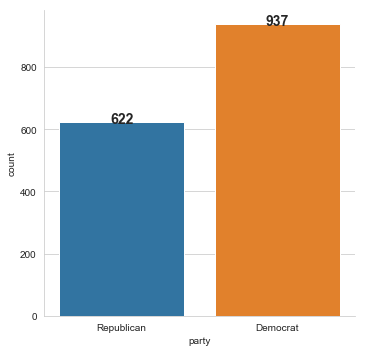

In [12]:
plot = sns.catplot(x="party", kind="count", data=df)

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i,  # bar index (x coordinate of text)
        h+10,  # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center',
        va='center',
        fontweight='bold',
        size=14)

In [13]:
Obama_Speeches=df[(df.candidate=='Barack Obama')].reset_index(drop=True)

In [14]:
Obama_Speeches.head()

,candidate,date,speech title,text,party
0,Barack Obama,2007-02-10,Remarks Announcing Candidacy for President in ...,Let me begin by saying thanks to all you who'v...,Democrat
1,Barack Obama,2007-03-02,Remarks at the AIPAC Policy Forum in Chicago,Thank you so much for your kind introduction a...,Democrat
2,Barack Obama,2007-03-04,Remarks at the Selma Voting Rights March Comme...,"Here today, I must begin because at the Unity ...",Democrat
3,Barack Obama,2007-04-23,Remarks to the Chicago Council on Global Affairs,Good morning. We all know that these are not t...,Democrat
4,Barack Obama,2007-05-02,Remarks to the California State Democratic Con...,It has now been a little over two months since...,Democrat


In [516]:
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import LancasterStemmer, SnowballStemmer, RegexpStemmer, WordNetLemmatizer 
from textblob import TextBlob
from nltk.tag import pos_tag

In [463]:
# keywords of the document 
print(keywords(Obama_Speeches.text[0]))

let
letting
people
state
states
better
work
working
worked
away
today
american
americans
like
divided
divide
health
politics
rights
right
faith
ethics
ethic
possible
possibility
care
job
jobs
future
free
frees
lincoln
hope
hopeful
america
political points
south
common hopes
senator
lawyer
new generation
fuels
fuel
promised
promises
love
loved
generations
change
changed
changes
unguarded
certain
city
cities
mounting
mounts
long
tough
death
troops
greenhouse
gangly
hard
lives
living
finally
family
families
child turns
schools
school
turned
turn
country
safe
high
priorities
organizer
organizers
organized
person
power
set
simple powerful
chronic
chronically
single
homegrown
dick
happens
happened
happen
called
calling


In [452]:
# stopwords are unique to each corpus/project you do
my_stopwords =(stopwords.words('english'))

In [453]:
my_stopwords.extend(["'s","'ve","n't","'s","'re"])

In [454]:
my_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [455]:
tokens=TextBlob(Obama_Speeches.text[0]).words.lower()

In [456]:
from textblob import Word
tokens[5]

'thanks'

In [457]:
tokens=[x.lemmatize('VBZ') for x in tokens ]

In [458]:
lemmatizer = WordNetLemmatizer()
tokens=[lemmatizer.lemmatize(x) for x in tokens]


In [459]:
tokens=[x for x in tokens if x not in my_stopwords]

In [460]:
tokens

['let',
 'begin',
 'say',
 'thank',
 'travel',
 'far',
 'wide',
 'brave',
 'cold',
 'today',
 'make',
 'journey',
 'reason',
 'humble',
 'heart',
 'know',
 'come',
 'come',
 'believe',
 'country',
 'face',
 'war',
 'believe',
 'peace',
 'face',
 'despair',
 'believe',
 'hope',
 'face',
 'politics',
 'shut',
 'tell',
 'settle',
 'divide',
 'u',
 'long',
 'believe',
 'one',
 'people',
 'reach',
 'possible',
 'build',
 'perfect',
 'union',
 'journey',
 'today',
 'let',
 'tell',
 'come',
 'know',
 'native',
 'great',
 'state',
 'move',
 'illinois',
 'two',
 'decade',
 'ago',
 'young',
 'man',
 'year',
 'college',
 'know',
 'one',
 'chicago',
 'without',
 'money',
 'family',
 'connection',
 'group',
 'church',
 'offer',
 'job',
 'community',
 'organizer',
 '13,000',
 'year',
 'accept',
 'job',
 'sight',
 'unseen',
 'motivate',
 'single',
 'simple',
 'powerful',
 'idea',
 'might',
 'play',
 'small',
 'part',
 'build',
 'better',
 'america',
 'work',
 'take',
 'chicago',
 'poorest',
 'neighbo

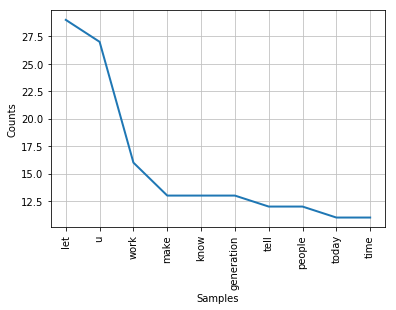

In [461]:
# Top 60 words
dist = FreqDist(tokens)
dist.plot(10, cumulative=False)

In [613]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

# change this to read in your data
finder = BigramCollocationFinder.from_words(nltk.Text(tokens))

# only bigrams that appear 3+ times
finder.apply_freq_filter(3)

# return the 5 n-grams with the highest PMI
finder.nbest(trigram_measures.pmi, 5)

[('health', 'care'), ('one', 'people'), ('work', 'together'), ('u', 'power'), ('let', 'generation')]

In [517]:
nltk.pos_tag(tokens)

[('let', 'VB'),
 ('begin', 'VB'),
 ('say', 'VB'),
 ('thank', 'JJ'),
 ('travel', 'NN'),
 ('far', 'RB'),
 ('wide', 'JJ'),
 ('brave', 'VBP'),
 ('cold', 'VBN'),
 ('today', 'NN'),
 ('make', 'VBP'),
 ('journey', 'NN'),
 ('reason', 'NN'),
 ('humble', 'JJ'),
 ('heart', 'NN'),
 ('know', 'VBP'),
 ('come', 'VBN'),
 ('come', 'JJ'),
 ('believe', 'VBP'),
 ('country', 'NN'),
 ('face', 'VBP'),
 ('war', 'NN'),
 ('believe', 'VBP'),
 ('peace', 'NN'),
 ('face', 'NN'),
 ('despair', 'NN'),
 ('believe', 'VBP'),
 ('hope', 'NN'),
 ('face', 'NN'),
 ('politics', 'NNS'),
 ('shut', 'VBP'),
 ('tell', 'VB'),
 ('settle', 'JJ'),
 ('divide', 'JJ'),
 ('u', 'NN'),
 ('long', 'RB'),
 ('believe', 'VB'),
 ('one', 'CD'),
 ('people', 'NNS'),
 ('reach', 'VBP'),
 ('possible', 'JJ'),
 ('build', 'NN'),
 ('perfect', 'NN'),
 ('union', 'NN'),
 ('journey', 'NN'),
 ('today', 'NN'),
 ('let', 'VB'),
 ('tell', 'VB'),
 ('come', 'VB'),
 ('know', 'JJ'),
 ('native', 'JJ'),
 ('great', 'JJ'),
 ('state', 'NN'),
 ('move', 'NN'),
 ('illinois', 'NN

In [536]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [537]:
doc = nlp(Obama_Speeches.text[0])

In [543]:
list(doc.sents)[0]

Let me begin by saying thanks to all you who've traveled, from far and wide, to brave the cold today.

In [545]:
# get all tags
all_tags = {w.pos: w.pos_ for w in doc}
all_tags

{100: 'VERB', 95: 'PRON', 85: 'ADP', 92: 'NOUN', 90: 'DET', 97: 'PUNCT', 86: 'ADV', 89: 'CCONJ', 84: 'ADJ', 94: 'PART', 93: 'NUM', 96: 'PROPN', 99: 'SYM', 87: 'AUX'}

In [549]:
# all tags of first sentence of our document
for word in list(doc.sents)[0]:
    print (word, word.tag_)

Let VB
me PRP
begin VB
by IN
saying VBG
thanks NNS
to IN
all DT
you PRP
who WP
've VB
traveled VBN
, ,
from IN
far RB
and CC
wide JJ
, ,
to TO
brave VB
the DT
cold JJ
today NN
. .


In [554]:
# define some parameters
noisy_pos_tags = ['PROPN']
min_token_length = 2

# Function to check if the token is a noise or not

def isNoise(token):
    is_noise = False
    if token.pos_ in noisy_pos_tags:
        is_noise = True
    elif token.is_stop == True:
        is_noise = True
    elif len(token.string) <= min_token_length:
        is_noise = True
    return is_noise


def cleanup(token, lower=True):
    if lower:
        token = token.lower()
    return token.strip()

In [555]:
# top unigrams used 
from collections import Counter
cleaned_list = [cleanup(word.string) for word in doc if not isNoise(word)]
Counter(cleaned_list) .most_common(5)

[('let', 28), ('people', 13), ('know', 12), ('work', 12), ('today', 11)]

In [569]:
labels = set([w.label_ for w in doc.ents])
for label in labels:
    entities = [cleanup(e.string, lower=False)
                for e in doc.ents if label == e.label_]
    entities = list(set(entities))
    print (label, entities)

DATE ['today', 'two decades ago', 'three years', 'March of 2008', 'years', 'September day', 'Today', 'this year', 'the last six years', 'every four years']
LOC ['North and South', 'Earth', 'West', 'East', 'Katrina']
FAC ['the Old State Capitol']
MONEY ['13,000']
EVENT ['Depression', 'Watergate']
ORDINAL ['first']
QUANTITY ['a thousand miles']
PERSON ['Dick Lugar', 'Abraham Lincoln']
ORG ['Congress', 'Lincoln']
CARDINAL ['one', 'four', 'ten', 'millions']
GPE ['Springfield', 'Chicago', 'America', 'North, South', 'Iraq', 'the United States', 'Illinois', 'Empire', 'Washington']
NORP ['Sunni', 'Republican', 'Shia', 'American', 'Americans', 'Christian', 'Iraqis']


In [620]:
displacy.serve(doc, style="ent")

/anaconda3/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  "__main__", mod_spec)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [621]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)


today 95 100 DATE
one 511 514 CARDINAL
today 615 620 DATE
Illinois 736 744 GPE
two decades ago 750 765 DATE
Chicago 836 843 GPE
13,000 961 967 MONEY
America 1118 1125 GPE
Chicago 1154 1161 GPE
a thousand miles 1540 1556 QUANTITY
Christian 1782 1791 NORP
three years 1805 1816 DATE
Springfield 2245 2256 GPE
America 2282 2289 GPE
today 2528 2533 DATE
Springfield 3139 3150 GPE
North, South 3158 3170 GPE
East 3172 3176 LOC
West 3181 3185 LOC
American 3252 3260 NORP
America 3349 3356 GPE
the Old State Capitol 3392 3413 FAC
Lincoln 3421 3428 ORG
today 3542 3547 DATE
the United States 3590 3607 GPE
Washington 3760 3770 GPE
Washington 3829 3839 GPE
Empire 4069 4075 GPE
Depression 4178 4188 EVENT
millions 4228 4236 CARDINAL
Today 4543 4548 DATE
Abraham Lincoln 4759 4774 PERSON
millions 4948 4956 CARDINAL
North and South 5013 5028 LOC
Lincoln 5156 5163 ORG
today 5187 5192 DATE
one 5267 5270 CARDINAL
Americans 5283 5292 NORP
today 5335 5340 DATE
years 5610 5615 DATE
the last six years 6052 6070 DA

In [651]:
def produce_plot(result, fig_name, kind):
    """Save plot of result
    Parameters:
    result: data to draw
    fig_name: figure name
    kind: type of data used to plot
    """
    
    plt.bar(["\"{}\"".format(i[0]) for i in result], [i[1] for i in result])
    plt.ylabel('total')
    plt.xlabel('term')
    plt.xticks(rotation=45, fontsize=12)
    plt.title("Top {}{} ({})".format(kind, 's', fig_name.title()))
    plt.subplots_adjust(bottom=0.30)
    plt.show()
    plt.close()

In [652]:
def top_pos(doc, pos, n, fig_name=""):
    """Finds the top n spaCy pos

    Parameters:
    doc: spaCy's doc
    pos: pos we are interesting in finding; one of "VERB", "NOUN", "ADJ" or "ADV"
    n: how many pos
    fig_name: name of the plot
    """
    
    pos_count = {}
    for token in doc:
        # ignore stop words
        if token.is_stop:
            continue

        if token.pos_== pos:
            if token.lemma_ in pos_count:
                pos_count[token.lemma_] += 1
            else:
                pos_count[token.lemma_] = 1

    # sort by values, but before get only those keys where value > 1;
    # I want lemmas that appear more than one
    # lastly, get the first n results
    result = sorted({k: v for (k, v) in pos_count.items() if v > 1}.items(),
                    key=lambda kv: kv[1], reverse=True)[:n]

    print("top 10 {} {}".format(pos, result))
    produce_plot(result, fig_name, pos)

top 10 NOUN [('people', 13), ('generation', 13), ('today', 11), ('time', 11), ('country', 7), ('face', 7), ('war', 7), ('year', 7), ('heart', 6), ('hope', 6)]


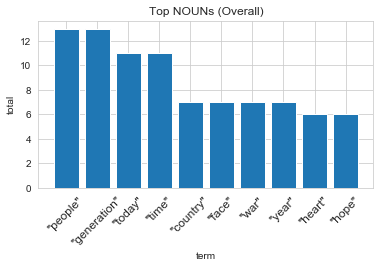

In [653]:
top_pos(doc, 'NOUN', 10, "overall")

top 10 ADJ [('well', 6), ('possible', 4), ('good', 4), ('able', 3), ('common', 3), ('new', 3), ('young', 2), ('single', 2), ('civil', 2), ('willing', 2)]


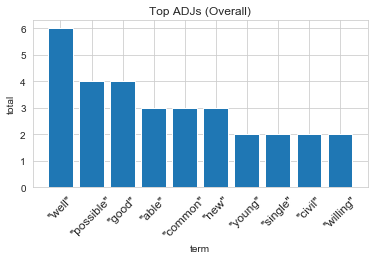

In [654]:
top_pos(doc, 'ADJ', 10, "overall")

top 10 VERB [('let', 29), ('know', 13), ('tell', 12), ('work', 10), ('come', 9), ('believe', 7), ('bring', 6), ('need', 6), ('build', 5), ('turn', 5)]


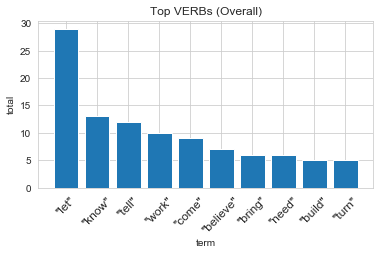

In [655]:
top_pos(doc, 'VERB', 10, "overall")

In [648]:
def top_entities(doc, n,):
    """Finds the top n spaCy entities
    Parameters:
    doc: spaCy's doc
    n: how many entities
    fig_name: name of the plot
    """
    
    entities = {}
    # named entities
    for ent in doc.ents:
        # Print the entity text and its label
        if ent.text in entities:
            entities[ent.text] += 1
        else:
            entities[ent.text] = 1
    result = sorted(entities.items(), key=lambda kv: kv[1], reverse=True)[:n]
    print("top 10 entities {}".format(result))

    plt.barh(["\"{}\"".format(i[0]) for i in result], [i[1] for i in result])
    plt.ylabel('total')
    plt.xlabel('named entity')
    plt.xticks(rotation='horizontal', fontsize=10)
    plt.title("Top {} named entities".format(n))
    plt.subplots_adjust(bottom=0.40)
    plt.show()
    plt.close()

top 10 entities [('today', 9), ('America', 9), ('one', 4), ('millions', 4), ('Springfield', 3), ('Lincoln', 3), ('Washington', 3), ('Americans', 3), ('Chicago', 2), ('American', 2)]


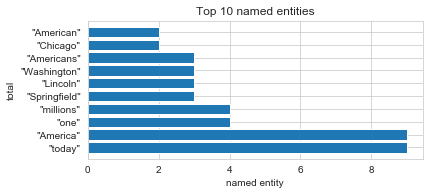

In [649]:
top_entities(doc,10)

In [687]:
phrases=[np.text for np in doc.noun_chunks]
counter = Counter(phrases)
print(counter.most_common(20))

[('we', 48), ('I', 43), ('us', 27), ('you', 21), ("'s", 16), ('We', 13), ('It', 12), ('they', 10), ('what', 9), ('it', 9), ('the generation', 9), ('me', 7), ('who', 7), ('the face', 7), ('them', 7), ('people', 6), ('He', 6), ('America', 5), ('time', 5), ('hope', 3)]
